In [1]:
!pip install tensorflow

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3099, in _parsed_pkg_info
    return self._pkg_info
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info. Did you mean: 'egg_info'?

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py",

In [2]:
!pip install keras

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [4]:
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range=0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range  =0.2,
                                   fill_mode = "nearest",
                                   validation_split=0.15,
                                   horizontal_flip= True)
test_datagen = ImageDataGenerator (rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/BrainTumor/Training",
                                       target_size = (130,130),
                                       seed=123,
                                       batch_size  = 16,
                                       subset="training"
                                      )
val_set = train_datagen.flow_from_directory("/content/drive/MyDrive/BrainTumor/Training",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     subset="validation"
                                      )
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/BrainTumor/Testing",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     shuffle=False)

Found 2441 images belonging to 4 classes.
Found 429 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [7]:
parameters = training_set.class_indices
Total_parameters = list(parameters.keys())
Total_parameters

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [8]:
import numpy as np
import matplotlib.pyplot as plt

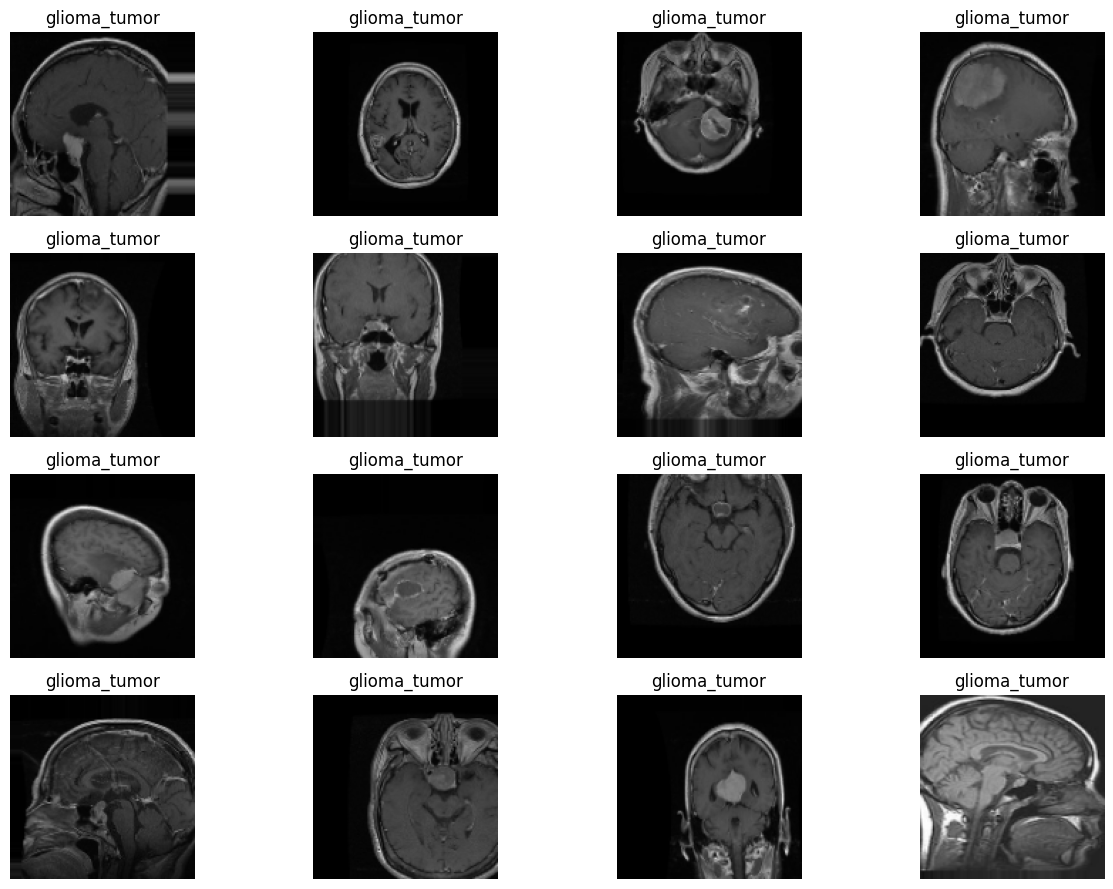

In [11]:
x,y = next(training_set)
def plotImages(x,y):
    plt.figure(figsize=[15,11])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(Total_parameters[np.argmax(y[i])])
        plt.axis("off")
    plt.show()
plotImages(x,y)

In [9]:
classifier = Sequential()
classifier.add (Conv2D(16, (3, 3), input_shape = (130,130 , 3), activation = 'relu'))
classifier.add (MaxPooling2D(pool_size = (2, 2)))
classifier.add (Conv2D(32, (3, 3), activation = 'relu'))
classifier.add (MaxPooling2D((2, 2)))
classifier.add (Dropout(0.20))
classifier.add (Flatten())
classifier.add (Dense(64, activation = 'relu'))
classifier.add (Dense(32, activation = 'relu'))
classifier.add (Dense(10, activation = 'relu'))
classifier.add (Dense(4, activation='softmax'))

In [10]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 flatten (Flatten)           (None, 30752)             0

In [11]:
classifier.fit(training_set,
               validation_data=val_set,
               epochs=15,
               batch_size=32,
               verbose=1)

Epoch 1/15
153/153 [==============================] - 468s 3s/step - loss: 0.5480 - accuracy: 0.3892 - val_loss: 0.5196 - val_accuracy: 0.3450
Epoch 2/15
153/153 [==============================] - 26s 170ms/step - loss: 0.4779 - accuracy: 0.5088 - val_loss: 0.5120 - val_accuracy: 0.4336
Epoch 3/15
153/153 [==============================] - 26s 170ms/step - loss: 0.4438 - accuracy: 0.5547 - val_loss: 0.4847 - val_accuracy: 0.4406
Epoch 4/15
153/153 [==============================] - 26s 173ms/step - loss: 0.4269 - accuracy: 0.5854 - val_loss: 0.4655 - val_accuracy: 0.4289
Epoch 5/15
153/153 [==============================] - 26s 172ms/step - loss: 0.4008 - accuracy: 0.6088 - val_loss: 0.4416 - val_accuracy: 0.5128
Epoch 6/15
153/153 [==============================] - 27s 174ms/step - loss: 0.3874 - accuracy: 0.6333 - val_loss: 0.4859 - val_accuracy: 0.4848
Epoch 7/15
153/153 [==============================] - 27s 174ms/step - loss: 0.3711 - accuracy: 0.6628 - val_loss: 0.4329 - val_accu

In [12]:
classifier.evaluate(test_set)

25/25 [==============================] - 85s 4s/step - loss: 0.9992 - accuracy: 0.3706


[0.9991776347160339, 0.37055838108062744]

In [15]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps

In [16]:
data = np.ndarray(shape=(1, 130, 130, 3), dtype=np.float32)
image = Image.open("/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(10).jpg")
size = (130, 130)

<ipython-input-17-401d93e486ca>:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


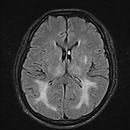

In [17]:
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
display(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data[0] = normalized_image_array

In [18]:
prediction = classifier.predict(data)
print(prediction)
predict_index = np.argmax(prediction)
print(predict_index)

1/1 [==============================] - 0s 249ms/step
[[0. 0. 1. 0.]]
2


In [20]:
print("The likelihood of the person having No Tumor is  {:.2f}".format(prediction[0][2]*100))


The likelihood of the person having No Tumor is  100.00
